<a href="https://colab.research.google.com/github/woodRock/deep-learning-goodfellow/blob/main/chapter_6_deep_feedforward_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 | Deep Feedforward Networks

Referneces:
1. Fukushima, K., & Miyake, S. (1982). Neocognitron: A new algorithm for pattern recognition tolerant of deformations and shifts in position. Pattern recognition, 15(6), 455-469.
2. Dugas, C., Bengio, Y., Bélisle, F., Nadeau, C., & Garcia, R. (2000). Incorporating second-order functional knowledge for better option pricing. Advances in neural information processing systems, 13.
3. Hornik, K., Stinchcombe, M., & White, H. (1989). Multilayer feedforward networks are universal approximators. Neural networks, 2(5), 359-366.
4. Hornik, K., Stinchcombe, M., & White, H. (1990). Universal approximation of an unknown mapping and its derivatives using multilayer feedforward networks. Neural networks, 3(5), 551-560.

A feedforward neural network approximates some function $y=f^*(x)$ which maps an input $x$ to a category $y$.

These models are called **feedforward** because information flows the the function being evaluated from $x$, through the intermediate computations used to define $f$, and fainally to the output $y$.

THere is no **feedback** connections in which outputs of the model are fed back into itself. When feedfoward neural networks are extended to include feedback connections, they are called **recurrent neural networks**.

Because the training data does not show the desired output for each of these layers, they are called **hidden layers**.

We have a model

$$
  y = f(x;\theta,w) = \phi (x;\theta) ^T w
$$

This is an example of a deep feedfoward network, with $\phi$ defining the hidden layer.


In [1]:
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]).T
y = np.eye(2)[y]

def tanh(x):
    return np.tanh(x)

def tanh2deriv(output):
    return 1 - (output ** 2)

def relu(x):
    return (x >= 0) * x

def relu2deriv(output):
    return (output >= 0)

def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

alpha = 0.0001
batch_size = 4
hidden_size = 100
input_dim = 2
output_dim = 2
epochs = 10_000

weights_0_1 = 0.02 * np.random.random((input_dim, hidden_size)) - 0.01
weights_1_2 = 0.2 * np.random.random((hidden_size, output_dim)) - 0.1

for j in range(epochs):
    correct_cnt = 0
    for i in range(int(len(X) / batch_size)):
        batch_start, batch_end = (i * batch_size, (i+1) * batch_size)
        input, target = X[batch_start:batch_end], y[batch_start:batch_end]
        # Feedfoward
        layer_0 = input
        layer_1 = tanh(np.dot(layer_0, weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = softmax(np.dot(layer_1, weights_1_2))
        prediciton = layer_2

        for k in range(batch_size):
            correct_cnt += int(np.argmax(target[k:k+1]) == np.argmax(prediciton[k:k+1]))

        # Back progpation
        layer_2_delta = (target - prediciton) / (batch_size * prediciton.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)

        # Update the weights
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if (j % 100 == 0 or j ==  epochs -1):
        accuracy = correct_cnt / float(len(X))
        print(f"Epoch: {j} | Accuracy: {accuracy:.4f}")
        if accuracy == 1:
            break


Epoch: 0 | Accuracy: 0.7500
Epoch: 100 | Accuracy: 1.0000


# Example: Learning XOR

The XOR function ("exclusive or") is an operation on two binary variables $x_1$ and $x_2$. When exactly one of these binary values is equal to 1, the XOR function returns 1. Otherwise, it returns 0. The XOR function provides the target function $y = f^*(x)$ that we want to learn.


In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]).T
y = np.eye(2)[y]
print(f"X: {X}, y: {y}")

X: [[0 0]
 [0 1]
 [1 0]
 [1 1]], y: [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [3]:
import numpy as np

class LinearRegressionXOR:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(2, 1)
        self.bias = np.random.rand(1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15  # Small value to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def train(self, X, y):
        for _ in range(self.epochs):
            # Forward pass
            y_pred = self.forward(X)

            loss = self.cross_entropy_loss(y, y_pred)

            # Compute gradients
            d_loss = (y_pred - y) / len(X)
            d_weights = np.dot(X.T, d_loss)
            d_bias = np.sum(d_loss)

            # Update weights and bias
            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return np.round(self.forward(X))

# XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create and train the model
model = LinearRegressionXOR(learning_rate=0.1, epochs=10000)
model.train(X, y)

# Test the model
for inputs in X:
    prediction = model.predict(inputs.reshape(1, -1))
    print(f"Input: {inputs}, Predicted Output: {prediction[0][0]}")

print("\nFinal Weights:", model.weights.flatten())
print("Final Bias:", model.bias[0])
print("Final Loss:", model.loss(y, model.forward(X)))

Input: [0 0], Predicted Output: 0.0
Input: [0 1], Predicted Output: 0.0
Input: [1 0], Predicted Output: 0.0
Input: [1 1], Predicted Output: 0.0

Final Weights: [-2.48793379e-16 -2.46696518e-16]
Final Bias: 1.659903992188317e-16
Final Loss: 0.25


Clearly, we must use a non-linear function to describe the features. Most neural networks do so using an affine transformation controlled by learned paramters, followed by a fixed nonlinear function called an activation function. We use that strategy here by defining $h = g(W^Tx + c)$ where $W$ provides the weights of a lienar trnasformation and $x$ the biases. Previously, to describe a linear regression model, weused a vector of weights and a scalar bais parameter to describe an affine transformation from an input vector to an output scalar. Now we describe an affine transfromation from a vector $x$ to a vector $h$, so an entire vector of bias parameters is needed.

# Rectified Linear Unit

Rectified Linear unit (ReLU) proposed by (Fukushima 1982) is the default recommendation for activation functions for deep feedforward networks.
Defined as:

$$
  ReLU(x) = max(0,x)
$$

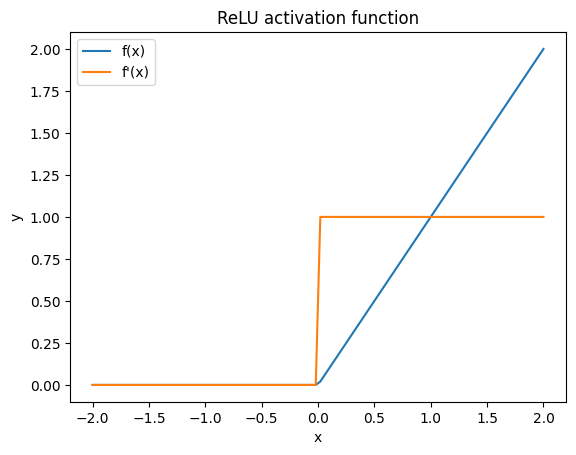

In [4]:
import matplotlib.pyplot as plt

def relu(x):
    return (x >= 0) * x

def relu2deriv(x):
    return (x >= 0)

x = np.linspace(-2,2,num=100)
y = relu(x)
y_deriv = relu2deriv(x)

plt.plot(x,y)
plt.plot(x,y_deriv)
plt.title("ReLU activation function")
plt.legend(['f(x)','f\'(x)'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The network can be written as

$$
  f (x;W,c,w,b) = W^T max \{0, W^Tx + c\} + b
$$

We can specify a solution to the XOR problem.

$$
  W = \begin{bmatrix}
        1 & 1\\
        1 & 1
      \end{bmatrix} \\
  C = \begin{bmatrix}
        1 \\
        -11
      \end{bmatrix} \\
  W = \begin{bmatrix}
      1\\
      -2
      \end{bmatrix}
$$

We can now walk throught how the model processes a batrch of inputs.
Let $X$ be the design matrix containing all four points in the binary input space, with one example per row.

$$
X = \begin{bmatrix}
    0 & 0\\
    0 & 1\\
    1 & 0\\
    1 & 1
    \end{bmatrix}
$$

The frist step is to multiply the input matrix by the first layer's weights matrix:

$$
XW = \begin{bmatrix}
    0 & 0\\
    0 & 1\\
    1 & 1\\
    2 & 2
    \end{bmatrix}
$$

Next, we add the bias vector $c$ to obtain

$$
    \begin{bmatrix}
    0 & -1\\
    1 & 0\\
    1 & 0\\
    2 & 1
    \end{bmatrix}
$$

We apply the rectified linear transformation

$$
    \begin{bmatrix}
    0 & 0\\
    1 & 0\\
    1 & 0\\
    2 & 1
    \end{bmatrix}
$$

We finish by mutliplying by the weight vector $w$.

$$
    \begin{bmatrix}
    0\\
    1\\
    1\\
    0
    \end{bmatrix}
$$

# Learning Conditional Distributions with Maximum Liklihood.

Most modern neural networks are trained using maximum likelihood. This means that the cost function is simply the negative log-likelihood, equivalently described as the cross-entropy between the training data and the model distribution. Given by:

$$
  J (\theta) = - \mathbb{E}_{x,y\sim \hat{p}_{data}} \log p_{model}(y|x)
$$

The exapnation of the above equation typically yields some terms that do not depend on the model parameters and may be discarded. For example if $p_{model}(y|x) = \mathcal{N}(y;f(x;\theta),I)$ then we can recover the mean squared error cost

$$
  J (\theta) = \frac{1}{2} \mathbb{E}_{x,y\sim \hat{p}_{data}} || y = f(x;\theta)||^2 + const
$$

up to a scaling factor of $\frac{1}{2}$ and a term that does not depend on $\theta$.

Previously we same the equivalnce between maxmum likelihood estimation with an output distribution and the minimization of mean squared error holds for a linear model, but in fact the equivalence holds regardless of the $f(x;\theta)$ used to predict the mean of the Gaussian.

Nice properties of loss functions:
- the gradient of the cost function must be large and predictable enough to serve as a good guide for the learning algorrithm.
- Functions that **saturate** (become very flat) undermine this objective because they make the gradeint become very small.
- Often the activatyion functions used to proeduce the output of hidden units or the output units saturate.
- The negative log-likelihood helps to avoid this problem for many models. Severla output units involve an exp function that can saturate when its argument is very negative. The log function in the negative log-likelihood cost function undoes the exp of some output units.

In [5]:
import numpy as np

class BinaryClassifier:
    def __init__(self, input_dim, learning_rate=0.01):
        self.weights = np.random.randn(input_dim)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15  # Small value to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip values to avoid log(0)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss
            loss = self.cross_entropy_loss(y, y_pred)

            # Compute gradients
            d_loss = y_pred - y
            d_weights = np.dot(X.T, d_loss) / len(y)
            d_bias = np.mean(d_loss)

            # Update parameters
            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        return loss

# Generate some random data for binary classification
np.random.seed(42)
X = np.random.randn(1000, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Create and train the model
model = BinaryClassifier(input_dim=2, learning_rate=0.1)
final_loss = model.train(X, y, epochs=1000)

print(f"\nFinal loss: {final_loss}")

# Test the model
test_X = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1]])
test_y = model.forward(test_X)
print("\nTest predictions:")
for x, y_pred in zip(test_X, test_y):
    print(f"Input: {x}, Predicted probability: {y_pred:.4f}")

Epoch 0, Loss: 1.0597822939195585
Epoch 100, Loss: 0.2962034345005809
Epoch 200, Loss: 0.22051883742657094
Epoch 300, Loss: 0.18710408849968513
Epoch 400, Loss: 0.16699077133842366
Epoch 500, Loss: 0.15311232700100863
Epoch 600, Loss: 0.1427550173440651
Epoch 700, Loss: 0.13462040019965424
Epoch 800, Loss: 0.12799764925338145
Epoch 900, Loss: 0.1224600564088091

Final loss: 0.11777752254433241

Test predictions:
Input: [1 1], Predicted probability: 0.9994
Input: [-1 -1], Predicted probability: 0.0005
Input: [ 1 -1], Predicted probability: 0.5273
Input: [-1  1], Predicted probability: 0.4397


# Learning Conditional Statistics

Instead of learning a full probability distribution $p(y|x;\theta)$, we often want to learn just one conditional statistic between $y$ given $x$

A **functional** is a mapping from functions to real numbers.We can view the cost function as being a functional rather than just a function.

The **calculus of variations** is a mathematical tool that allows us to derive the following two equations.

$$
  f^* = arg \texttt{ } min_f \mathbb{E}_{x,y\sim p_{data}} || y - f(x) || ^2 \\
  f^*(x) - \mathbb{E}_{y \sim p_{data} (y|x)} [y]
$$

Different cost functions give different statistics. A second result dervied using calculus of variations is that

$$
  f^* = arg \texttt{ } min_f \mathbb{E}_{x,y\sim p_{data}} || y - f(x) ||_1
$$

yirelds a function that predicts the _median_ value of $y$ for each $x$, as long as such a function may be described by the family of functions we optmize over. This cost function is commonly called **mean absolute error**.

Unforunately, mean square errir abd neab absolute error often lead to poor results when used with gradient-based optimization. Some output units that saturate produce very small gradients when combined with these cost functions. This is one reason that cross-entropy cost function is more popular than mean squared error or mean absolute error, even when it is not necessary to estimate an entire distribution $p(y|x).

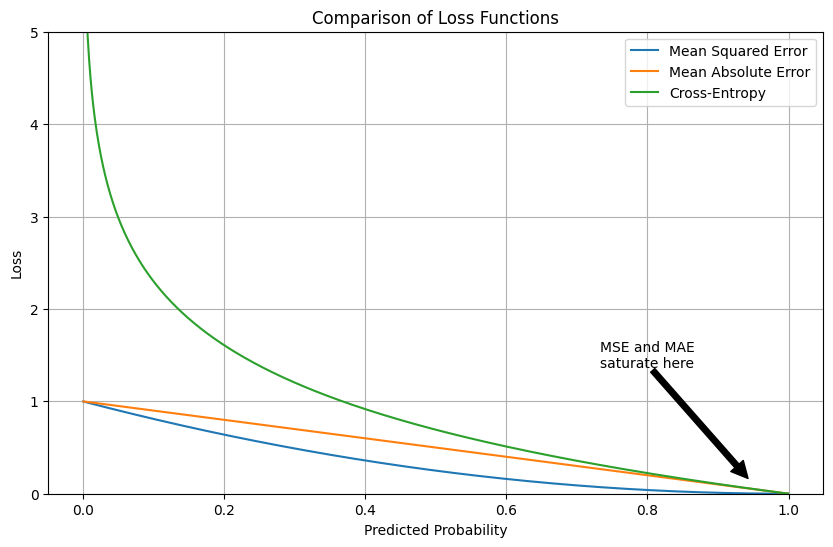

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def mse(y_true, y_pred):
    return (y_true - y_pred) ** 2

def mae(y_true, y_pred):
    return np.abs(y_true - y_pred)

def cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    return -np.log(y_pred + epsilon)

# Generate data points
y_true = 1  # Assume true label is 1
y_pred = np.linspace(0.001, 0.999, 1000)  # Predicted probabilities

mse_loss = mse(y_true, y_pred)
mae_loss = mae(y_true, y_pred)
ce_loss = cross_entropy(y_true, y_pred)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(y_pred, mse_loss, label='Mean Squared Error')
plt.plot(y_pred, mae_loss, label='Mean Absolute Error')
plt.plot(y_pred, ce_loss, label='Cross-Entropy')

plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.title('Comparison of Loss Functions')
plt.legend()
plt.grid(True)

# Set y-axis limit to better visualize the differences
plt.ylim(0, 5)

# Add text to explain saturation
plt.text(0.8, 1.5, 'MSE and MAE\nsaturate here',
         horizontalalignment='center', verticalalignment='center')
plt.annotate('', xy=(0.95, 0.1), xytext=(0.8, 1.4),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# Output Units

The choice of cost function is tightly coupled with the choice of output unit. Most of the time, we simply use the cross-entropy between the data distribution and the model distribution. The choise of how to represent the output then determins the form of the cross-entropy function.

- **Linear units** - output unit is based on an affine transformation with no nonlinearity.

## Sigmoid Units

- **sigmoid units** - strong gradient whenever the model has a wrong answer.
- represent a probability distribution over a binary variable.

The logstic sigmoid function is defined as

$$
  \sigma = \frac{1}{1 + e^{-x}}
$$

A sigmoid output unit is defined by

$$
  \hat{y} = \sigma (W^Th +b)
$$

We can think of the sigmoid output unit as having two components. First, is uses a linear layer to compute $z = w^Th + b$. Next is used the sigmoid acitvation function to convert $z$ into a probability.

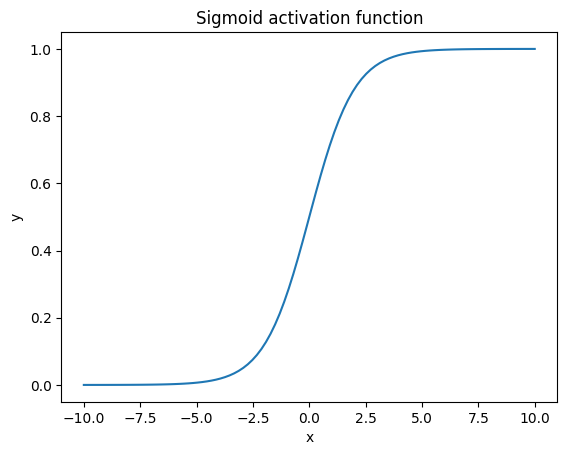

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x,y)
plt.title("Sigmoid activation function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We discuss how to define a probability distribution over $y$ using the value $z$.

The sigmoid can motivated by construcing an annormalized probability distribution $\hat{p}(y)$, which does not sum to 1. We can then devide by an apprpirate constant to obtian a valid probability  distibution. If we begin with the assumption that the unnormalized log probabiliies are linear in $y$ and $z$, we can exponentiate to obstain the unnormalized probabilites. When then nromalize to see that this yields a Bernoulli distribution controlled by a sigmoidal transformation of $z$

$$
  log \hat{P}(y) = yz \\
  \hat{P}(y) = exp(yz) \\
  P(y) = \frac{exp(yz)}{\sum_{y'=0}^1 exp(y'z)} \\
  P(y) = \sigma ((2y - 1)z)
$$

The $z$ variable defining such a distribution over binary variables is called a **logit**.

This approach to predicting the probabilites in log space is natrual to use with maxmium likelihood learning. because the cost function used with maximum likelihood is $- \log P(y|x)$, the log in the cost function undoes the $exp$$ of the sigmoid. Without this effect, the saturation of the sigmoid could prevent gradient-based  learning from making good progress.

The loss function for maximum likelihood learning of a Bernoulli parametrized by a sigmoid is

$$
  J (\theta) = - \log P(y|x) \\
  = - \log \sigma ((2y - 1)z) \\
  = \mathcal{L}((1 - 2y)z)
$$


With other loss functions, such as means squared error (MSE) or mean absolute error (MAE) the loss can saturate anytime $\sigma(z)$ saturates. The sugmoid activation function saturates to 0 when $z$ becomes very negative, and saturates to 1 when $z$ becomes very positive. The gadient can shrink too small to be useful for larning when this happens, whether the model has the correct or the incorrect answer. For this reason , maxmum likelihood is almost always the preferreed approach to training sigmoid output units.

Remember: The sigmoid function saturates when its argument is very positive or very negative, meaning that the function becomes very flat and insensitive to small changes in the input.


## Softmax Units

Any time we wish to represent a probability distribution over a discrete variable with $n$ possible vlaues, we may use the softmax function. This can be seen as a generalization of the sigmoid function, which was used to represent a probability distribution over a binary variable.

Softmax functions are most often used as the output of a classifier, to represent the probability distribution over $n$ different classes.

We produce a vector $\hat{y}$, with $\hat{y}_i = P(y=i|x)$. We reqire not only that each element of $\hat{y}_i$ be between 0 and 1, but also that the entire vector sums to 1 so that it represents a valid probability distribution.

$$
  z = W^T h + b \\
  softmax(z)_i = \frac{exp(z_i)}{\sum_j exp(z_j)} \\
  log \texttt{ } softmax(z)_i = z_i - \log \sum_j exp(z_j)
$$

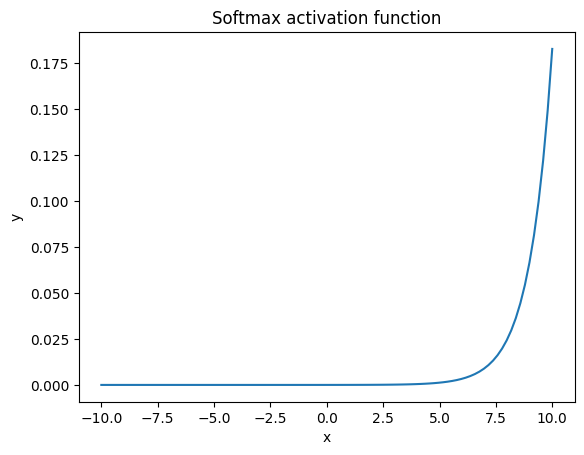

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

x = np.linspace(-10,10,100)
y = softmax(x)

plt.plot(x,y)
plt.title("Softmax activation function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Mean squared error is a poor loss function for softmax units can fail to learn when the argument to the exp becomes very negative, causing the gradient to **vanish**.

Softmax can sature when the differences btweeen input values become extreme.

The softmax output is invariant to adding the same scalar to all its inputs:

$$
  softmax(z)= softmax(z+c)
$$

Using this property, we can derive a numerically stable variant of softmax

$$
  softmax(z) = softmax(z - max_i z_i)
$$

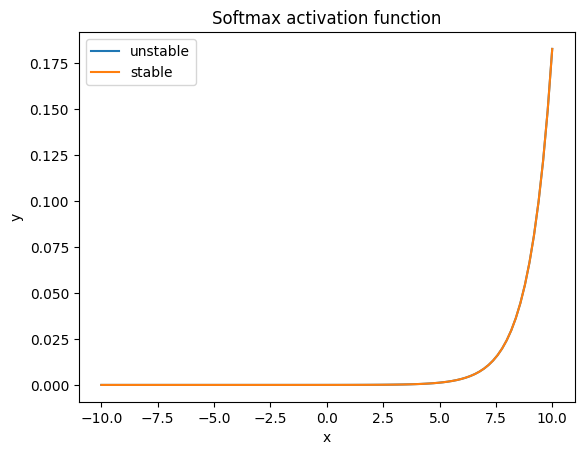

In [9]:
def unstable_softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp)

def stable_softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Plot both softmax.
x = np.linspace(-10,10,100)
y1 = unstable_softmax(x)
y2 = stable_softmax(x)

plt.plot(x,y1,label='unstable')
plt.plot(x,y2,label='stable')
plt.title("Softmax activation function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The softmax is a way to createa  form of competiont between the units that participate in it: the softmax outputs always sum to 1 so an increase in value of one unit necessarily corresponds to a decrease in the value of others. This is analogous to the **layer inhinbition** that is believed to exist between nearby neurons in the cortext. At the extreme (when the difference between maxmimal $a_i$ and the others is large in magnitude) it becomes a form of **winner-takes-all** (one of the outputs is nearly 1, and the others are nearly 0).

The name "softmax" can be somewhat confusing. The function is more closely related to the arg max function than the max function. The term "soft" derives from the fact that the softmax function is continious and differentiable. The arg max function, with its result represented as a one-hot vector, is not continious or differentiable. The softmax function thus provides a "softened" version of the arg max. The corresponding soft version of the maxmimum function is $softmax(z)^Tz$. It would perhaps be better to call the softmax function "softargmax".

## Other Output Types

Neural networks can generalize to almost any kind of output layer that we wish. The principle of maximum likelihood provides a guide for how to design a good cost function for nearly any kind of output layer.

In general we can think of the neural network as representing a function $f(x;\theta)$. THe outputs of this function are not directy predictions of the value $y$. Instead, $f(x;\theta) = w$ provides the parameters for a distribution over $y$, or loss function can then be interpreted as $- \log (p(y;w(x))$.

For example we may wish to learn the variance of a conditional Gaussian for $y$, given $x$.

# Heteroscedasticity

We may with a model to predict different amount of variance in $y$ for different values of $x$. This is called a **heteroscedastic** model.

“Skedasticity” comes from the Ancient Greek word “skedánnymi”, meaning “to scatter” (Wikipedia)

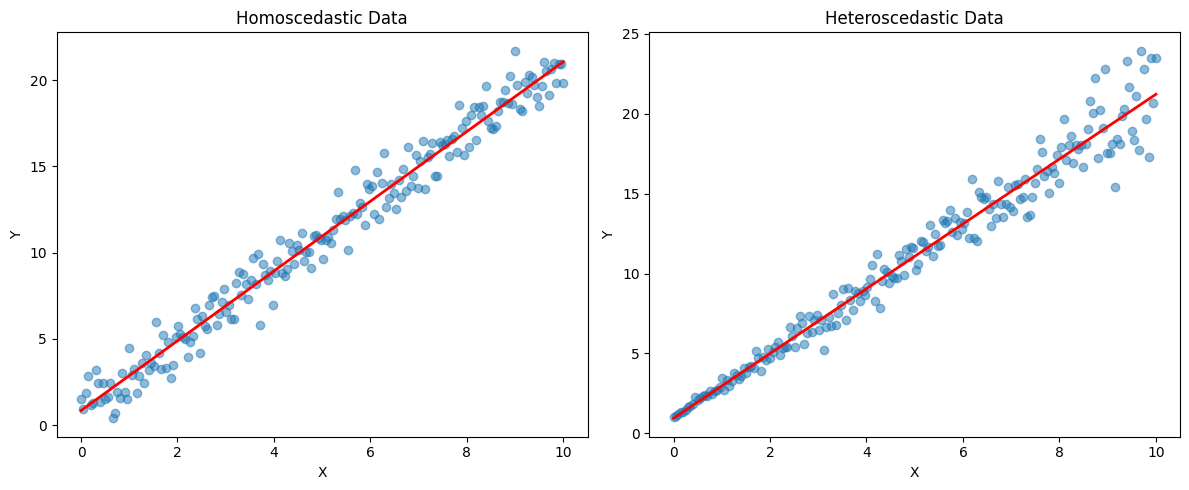

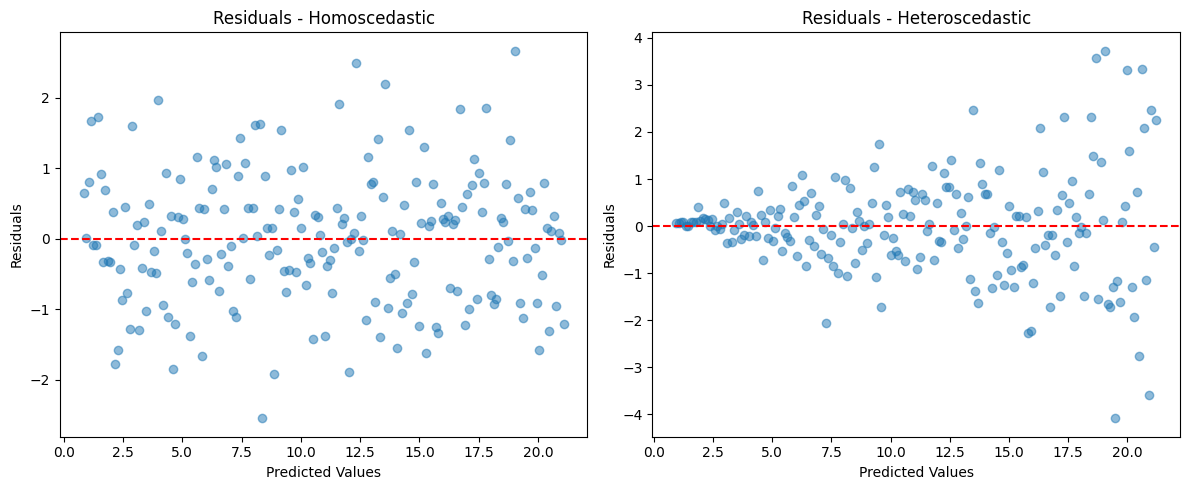

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n_samples = 200
X = np.linspace(0, 10, n_samples).reshape(-1, 1)

# Homoscedastic data
y_homoscedastic = 2 * X + 1 + np.random.normal(0, 1, size=(n_samples, 1))

# Heteroscedastic data
# Here, the variance of the error increases with X
y_heteroscedastic = 2 * X + 1 + np.random.normal(0, 0.2 * X, size=(n_samples, 1))

# Fit linear regression models
model_homo = LinearRegression().fit(X, y_homoscedastic)
model_hetero = LinearRegression().fit(X, y_heteroscedastic)

# Predictions
y_pred_homo = model_homo.predict(X)
y_pred_hetero = model_hetero.predict(X)

# Plotting
plt.figure(figsize=(12, 5))

# Homoscedastic plot
plt.subplot(121)
plt.scatter(X, y_homoscedastic, alpha=0.5)
plt.plot(X, y_pred_homo, color='r', linewidth=2)
plt.title('Homoscedastic Data')
plt.xlabel('X')
plt.ylabel('Y')

# Heteroscedastic plot
plt.subplot(122)
plt.scatter(X, y_heteroscedastic, alpha=0.5)
plt.plot(X, y_pred_hetero, color='r', linewidth=2)
plt.title('Heteroscedastic Data')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Residual plots
plt.figure(figsize=(12, 5))

# Homoscedastic residuals
plt.subplot(121)
residuals_homo = y_homoscedastic - y_pred_homo
plt.scatter(y_pred_homo, residuals_homo, alpha=0.5)
plt.title('Residuals - Homoscedastic')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

# Heteroscedastic residuals
plt.subplot(122)
residuals_hetero = y_heteroscedastic - y_pred_hetero
plt.scatter(y_pred_hetero, residuals_hetero, alpha=0.5)
plt.title('Residuals - Heteroscedastic')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Gaussian Mixture

Neural networks with Gaussian mixtures as their outputs are often called **mixture density networks**.

A Guassian mixture output with $n$ components is defined by conditional probability distribution

$$
  p(y|x) = \sum_{i=1}^{n} p(c=i|x) \mathcal{N}(y;\mu^{(i)}(x), \Sigma^{(i)}(x))
$$

It is rare to learn a covariance or precision matrix with richer structure than diagonal. If the covariance is full and conditional, then a parametrization must be chosen that guarantees positive definiteness of the predicted covariance matrix. This can be achived by writing

$$
  \Sigma(X) = B(x)B^T(x)
$$

where $B$ is an unconstrained quare matrix. One practical issue if the matrix is full rank is that computing the likjelihood is expensive, with a $d \times d$ matrix requiring $O(d^3)$ computation for the determinant and the inverse of $\Sigma(x)$ (or equavilanetly, and more commonly done, its eigendcomposition or that of $B(x)$

The neural network must have three outputs: a vector defining $p(c = i  | x)$, a matrix providing $\mu^{(i)})(x)$ for all $i$, and a tensor providing $\Sigma^{(i)}(x)$ for all $i$.

These outputs must satisfy different constraints.
1. Mixutre components $p(c = i |x)$: these form a multinoulli distribution over the $n$ different components associated with latern variable $C$ and can typcially be obtained by a softmax over an $n$-dimensional vector, to guarantee that these outputs are positive and sum to 1.
2. Means $\mu^{(i)}$: these indicate the center or mean associated with the $i$th Guassian component and ard unconstrained (typically with no nonlinearity at all for these output units).
3. Covariances $\Sigma^{(i)}$: these specifiy the covariance matrix for each component i. As when learning a single Gaussian component, we typically use a diagronal matrix to avoid needing to compute determinants.

It has been reported that gradient-based optimization of conditional guassian mixtures can be unreliable, in part because one gets divisions (by the variance) which can be numerically unstable (when some variance gets to be small for a particular examples, yielding very large gradients. One solutions is to **clip gradients**), while another is to scale gradients heuristically.

Epoch 0, Loss: 12.8406
Epoch 100, Loss: 2.3947
Epoch 200, Loss: 2.1643
Epoch 300, Loss: 1.8612
Epoch 400, Loss: 1.7359
Epoch 500, Loss: 1.6689
Epoch 600, Loss: 1.6711
Epoch 700, Loss: 1.5661
Epoch 800, Loss: 1.5860
Epoch 900, Loss: 1.5261


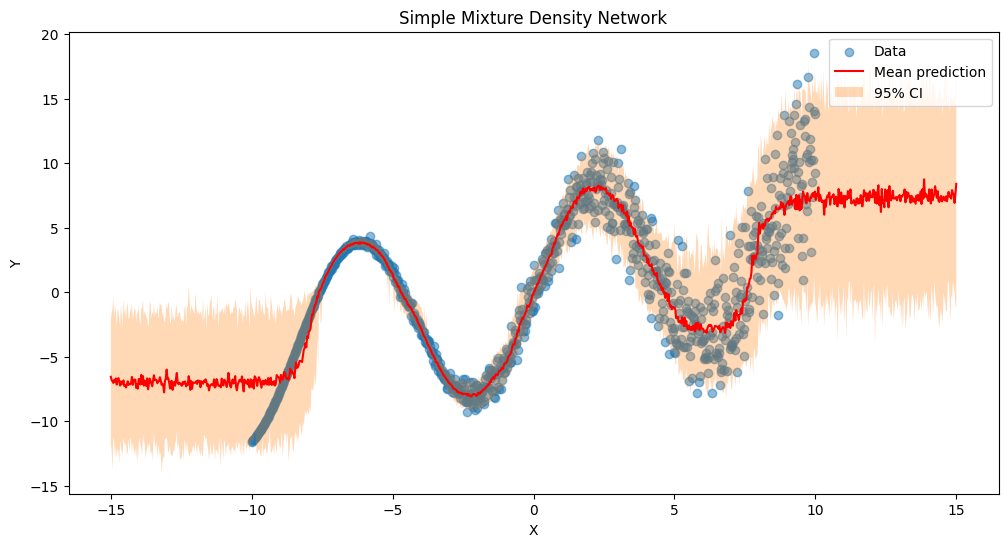

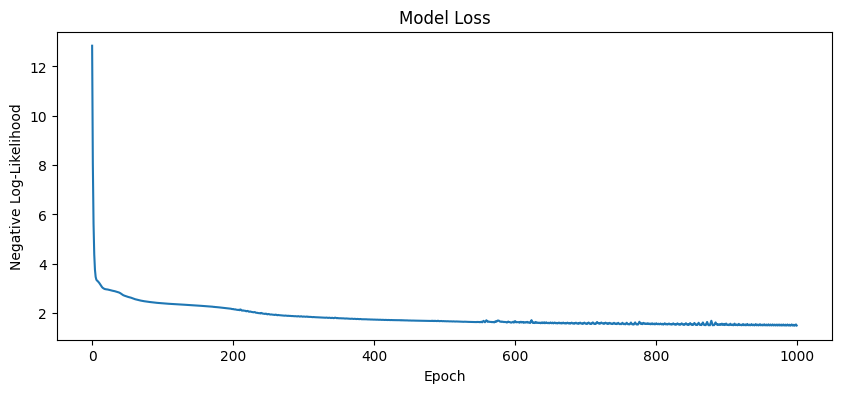

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate synthetic data
def generate_data(n_samples=1000):
    X = np.linspace(-10, 10, n_samples).reshape(-1, 1)
    y = 7 * np.sin(0.75 * X) + 0.5 * X + np.random.randn(n_samples, 1) * (1 + X * 0.1)**2
    return torch.FloatTensor(X), torch.FloatTensor(y)

# Define the MDN model
class SimpleMDN(nn.Module):
    def __init__(self, input_dim, hidden_dim, n_gaussians):
        super(SimpleMDN, self).__init__()
        self.hidden_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh()
        )
        self.pi_layer = nn.Linear(hidden_dim, n_gaussians)
        self.mu_layer = nn.Linear(hidden_dim, n_gaussians)
        self.sigma_layer = nn.Linear(hidden_dim, n_gaussians)

    def forward(self, x):
        h = self.hidden_layer(x)
        pi = torch.softmax(self.pi_layer(h), dim=1)
        mu = self.mu_layer(h)
        sigma = torch.exp(self.sigma_layer(h))
        return pi, mu, sigma

# Define the loss function
def mdn_loss(y, pi, mu, sigma):
    normal = torch.distributions.Normal(mu, sigma)
    log_prob = normal.log_prob(y.expand_as(mu))
    weighted_logprob = log_prob + torch.log(pi + 1e-8)
    return -torch.logsumexp(weighted_logprob, dim=1).mean()

# Training function
def train_mdn(model, X, y, epochs=1000, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        pi, mu, sigma = model(X)
        loss = mdn_loss(y, pi, mu, sigma)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    return losses

# Function to sample from the MDN
def sample_from_mdn(model, X, n_samples=1):
    pi, mu, sigma = model(X)
    n_mixtures = len(pi[0])

    mixture_idx = torch.multinomial(pi, n_samples, replacement=True)
    selected_mu = mu.gather(1, mixture_idx)
    selected_sigma = sigma.gather(1, mixture_idx)

    epsilon = torch.randn_like(selected_mu)
    samples = selected_mu + selected_sigma * epsilon

    return samples

# Generate data
X, y = generate_data()

# Create and train the model
input_dim = 1
hidden_dim = 20
n_gaussians = 5

model = SimpleMDN(input_dim, hidden_dim, n_gaussians)
losses = train_mdn(model, X, y, epochs=1000, lr=0.01)

# Generate predictions
X_test = torch.linspace(-15, 15, 1000).reshape(-1, 1)
y_samples = sample_from_mdn(model, X_test, n_samples=100)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(X.numpy(), y.numpy(), alpha=0.5, label='Data')
plt.plot(X_test.numpy(), y_samples.mean(dim=1).detach().numpy(), 'r', label='Mean prediction')
plt.fill_between(X_test.numpy().flatten(),
                 np.percentile(y_samples.detach().numpy(), 2.5, axis=1),
                 np.percentile(y_samples.detach().numpy(), 97.5, axis=1),
                 alpha=0.3, label='95% CI')
plt.legend()
plt.title('Simple Mixture Density Network')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Plot loss history
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title('Model Loss')
plt.ylabel('Negative Log-Likelihood')
plt.xlabel('Epoch')
plt.show()

# Hidden units

The design of hidden unites is an extremely active area of research and does not yet have many definitive guiding theoreticl principles. Rectified linear units (ReLU) (Fukushima 1982)are ab excellent default choice of hidden unit.

Unless indicated otherwise, most hidden units can be described as accpeting a vector of inputs $x$, computing an affine transformation $z = W^Tx =b$, and then appling an element-wise nonlinear function $g(z)$. Most hidden units are distinguished from each other only by the choice of the from of the activation function $g(z)$.

## Rectified Linear Units

Rectified Linear units the use the activation function $g(z) = max \{0,z\}$

The derivative of a rectifying operation is 1 everywhere the unit is active. This means the gradient dierction is far more useful for learning that it would with activation functions that introduce second-order effects.

Rectified linear units are typicall usede on top of an affine transformation:

$$
  h = g(W^\top x + b)
$$

When initializing the parameters of the affine transformation, it can be cgood precatise to set all elements of $b$ to a small positive value, such as 0.1. Doing so makes it very likely that the rectified linear units will be initially active for most inputs in the trainign set and allow the derivatives to pass through.

Cons:
* They cannot learn via gradient based methods on examples for which their activation is zero.

Rectified linear units and all the following generalizations of them are based on the principle that models are easier to optimize if their behaviour is close to linear.

Text(0, 0.5, 'y')

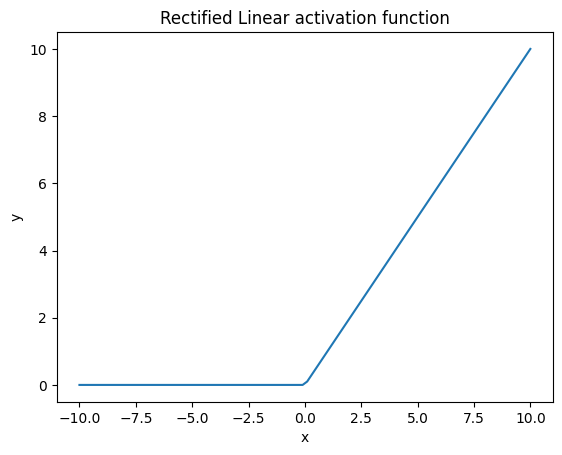

In [12]:
import numpy as np

def relu(x):
    return (x >= 0) * x

x = np.linspace(-10,10,100)
y = relu(x)

plt.plot(x,y)
plt.title("Rectified Linear activation function")
plt.xlabel('x')
plt.ylabel('y')

## Absolute value rectification

Three generalizations of rectified linear units are based on using a nonzero slop $\alpha_i$ when $z_i < 0: h_i = g(z,\alpha)_i = max(0,z_i) + \alpha_i min(0,z_i)$. Aboslute value rectification fixes $\alpha_i = -1$ to obtian $g(z) = |z|$.

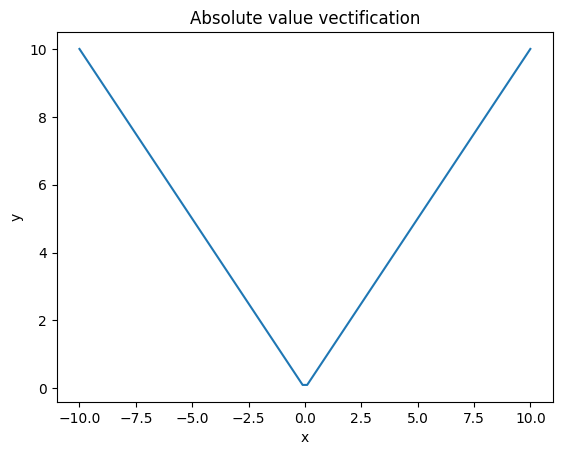

In [13]:
def aboslute_value_rectification(x):
    return np.abs(x)

x = np.linspace(-10,10,100)
y = aboslute_value_rectification(x)

plt.plot(x,y)
plt.title("Absolute value vectification")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Leaky ReLU

A **leaky ReLU** fixes $\alpha_i$ to a small value like 0.01,

Text(0, 0.5, 'y')

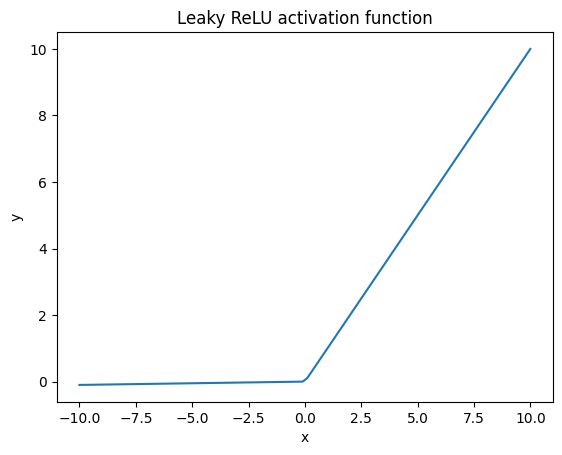

In [15]:
def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

x = np.linspace(-10,10,100)
y = leaky_relu(x)

plt.plot(x,y)
plt.title("Leaky ReLU activation function")
plt.xlabel('x')
plt.ylabel('y')

## Parametric ReLU (PReLU)

A parametric ReLU treats $\alpha_i$ as a learnable parameter.

## Maxout units

**Maxout units** generalize rectified linear units fruther. Instead of applying an element-wise function $g(z)$, maxoutinits divide $z$ into groups of $k$ values. Each maxoout unit then outputs the maximum element of one of these groups.

$$
  g(z_i) = max_{j \in \mathbb{G}
^{(i)}} z_j
$$

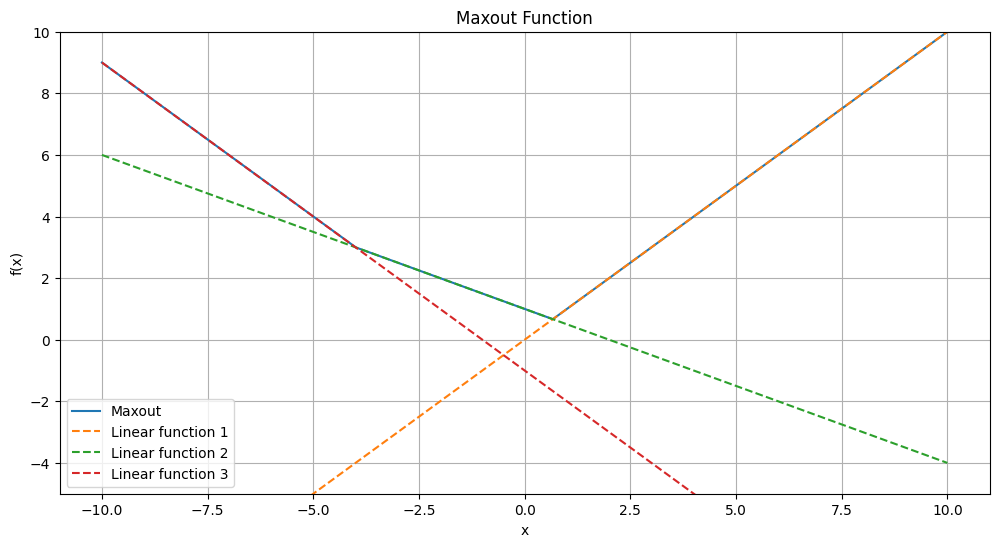

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def maxout(x, W, b):
    """
    Maxout function

    Parameters:
    x: input value or array (d-dimensional)
    W: weight matrix (k x d, where k is the number of linear functions and d is input dimension)
    b: bias vector (k-dimensional)
    """
    return np.max(np.dot(W, x) + b[:, np.newaxis], axis=0)

# Create a range of x values
x = np.linspace(-10, 10, 1000)

# Define weights and biases for 3 linear functions
W = np.array([[1, 0], [-0.5, 0], [-1, 0]])  # Each row is a weight vector
b = np.array([0, 1, -1])

# Compute maxout values
y = maxout(np.vstack((x, np.zeros_like(x))), W, b)

# Plot the maxout function
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Maxout')
plt.plot(x, W[0,0]*x + b[0], '--', label='Linear function 1')
plt.plot(x, W[1,0]*x + b[1], '--', label='Linear function 2')
plt.plot(x, W[2,0]*x + b[2], '--', label='Linear function 3')
plt.title('Maxout Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(-5, 10)  # Set y-axis limits for better visibility
plt.show()

## Catastrophic forgetting

When a neural network forgets how to perofrm tasks that they were trained on in the past.

## Logistic Sigmoid

Prior to the introduction of rectified linear units, most neural networks used the logistic sigmoid function

$$
  g(z) = \sigma(z) \\
  \sigma(z) = \frac{1}{1+e^{-x}}
$$

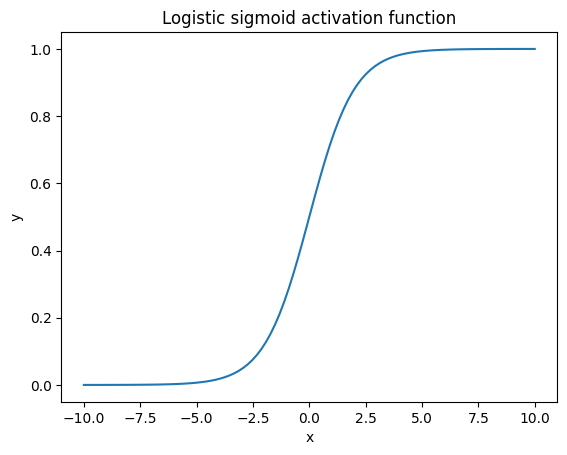

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10,10,100)
y = sigmoid(x)

plt.plot(x,y)
plt.title("Logistic sigmoid activation function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Hyperbolic tangent

or the hyperbolic tangent activation function

$$
  g(z) = tanh(z)
$$

Text(0, 0.5, 'y')

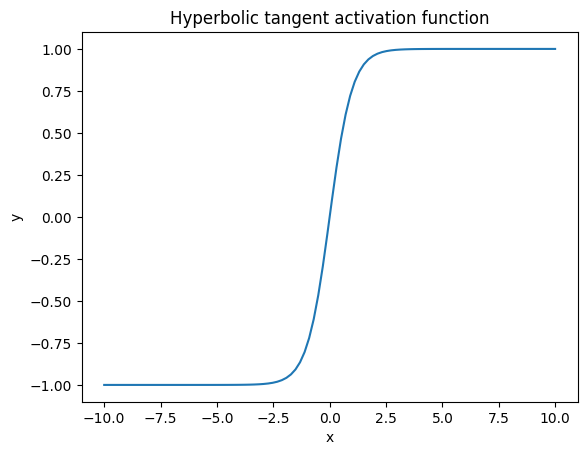

In [17]:
def tanh(x):
    return np.tanh(x)

x = np.linspace(-10,10,100)
y = tanh(x)

plt.plot(x,y)
plt.title("Hyperbolic tangent activation function")
plt.xlabel('x')
plt.ylabel('y')

These activations are closely related because

$$
  tanh(z) = 2\sigma(2z) - 1
$$

When a sigmoidal activation function must be used, the hyperbolioc trangent activation typically performs better than the logistuc sigmoid. It resemble the identity function more closely, in the sense that $tanh(0) = 0$ while $\sigma(0) = \frac{1}{2}$. Because tanh is similar to the identity function near 0, training a deep neural network $\hat{y} = w^\top (U^\top tanh(V^\top x))$ resemblers training a linear model $\hat{y} = w^\top U^\top V^\top x$ as long as the activations of the network can be kept small. This makes training the tanh network easier.

## Softmax Units

SOftmax units naturally represent a probability distribution over a discrete variable with $k$ possible values, so they may also be used as a kind of switch. These kinds of hidden units are usually only used in more advanced architectures that explicitly learn to manipulate memory.

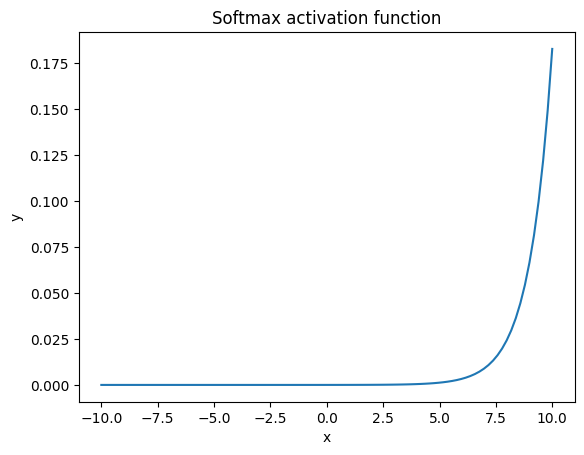

In [19]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

x = np.linspace(-10,10,100)
y = softmax(x)

plt.plot(x,y)
plt.title("Softmax activation function")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Radial basis function

Radial basis function (RBF) unit

$$
  h_i  = exp ( - \frac{1}{\sigma_i^2} || W_{:,i} - x ||^2)
$$

This function becomes more active as $x$ approaches a template $ W_{:,i} $. Because it saturates to 0 for most $x$, it can be difficult to optimize.

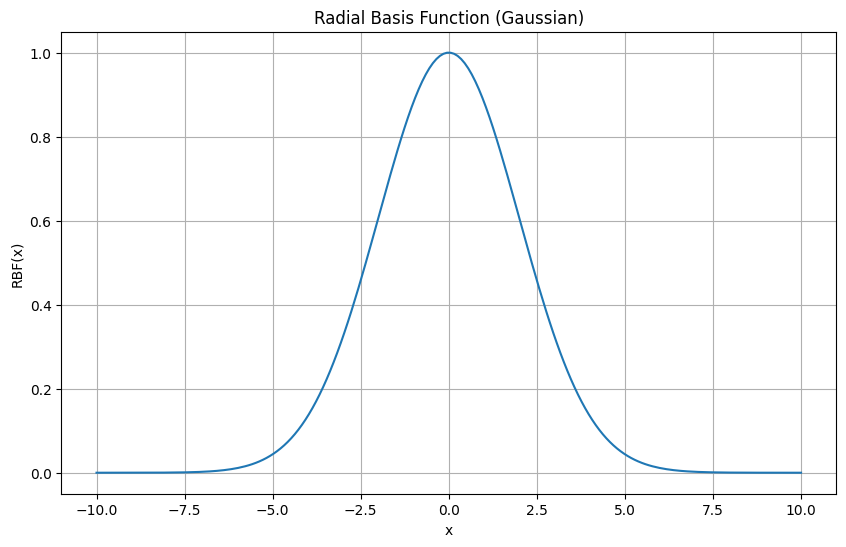

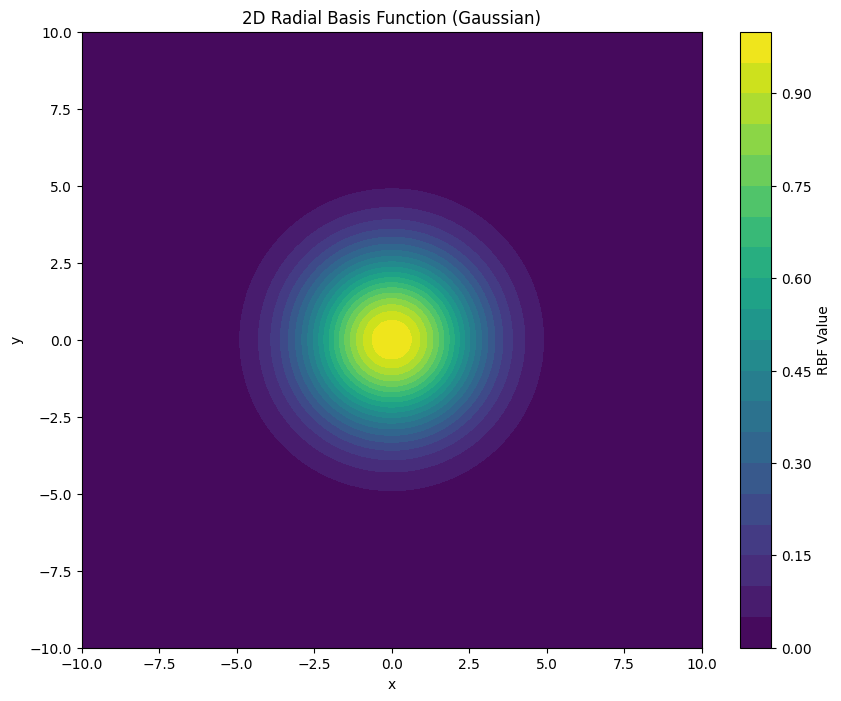

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def rbf(x, c, sigma=1.0):
    """
    Radial Basis Function (Gaussian)

    Parameters:
    x: input value or array
    c: center of the RBF
    sigma: width of the RBF
    """
    return np.exp(-((x-c)**2) / (2 * sigma**2))

# Create a range of x values
x = np.linspace(-10, 10, 200)

# Create RBF with center at 0 and sigma = 2
y = rbf(x, c=0, sigma=2)

# Plot the RBF
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Radial Basis Function (Gaussian)')
plt.xlabel('x')
plt.ylabel('RBF(x)')
plt.grid(True)
plt.show()

# Now let's create a 2D plot to better visualize the RBF
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute the RBF values
Z = rbf(np.sqrt(X**2 + Y**2), c=0, sigma=2)

# Create a 2D plot
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='RBF Value')
plt.title('2D Radial Basis Function (Gaussian)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Softplus

$$
  g(a) = \mathcal{L}(a) = \log (1 + e^a)
$$

This is a smooth version of the rectifier, introduced by (Dugas 2001). Use of the softplus is generally discouraged - one might expect it to have an advantage over the rectifier due to being differentiable everywhere or due to saturating less completely, but empircally it does not.

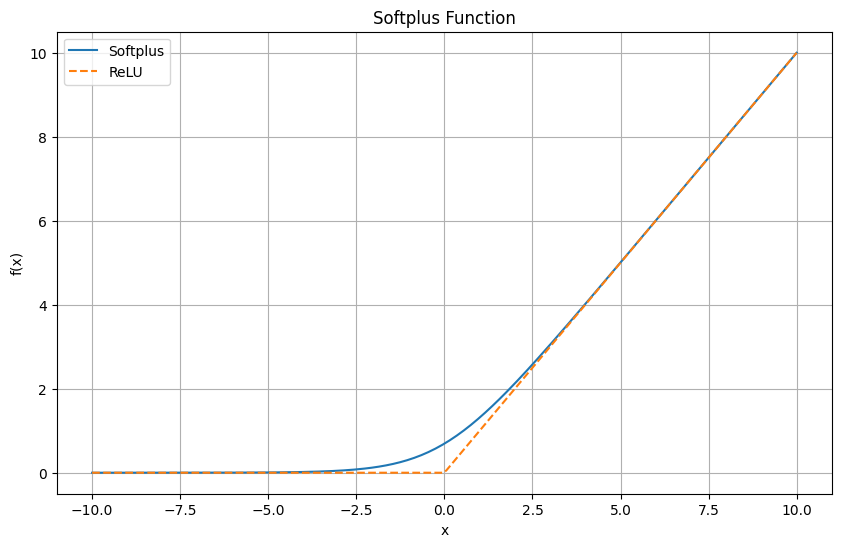

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def softplus(x):
    """
    Softplus function: f(x) = ln(1 + e^x)

    Parameters:
    x: input value or array
    """
    return np.log1p(np.exp(x))

# Create a range of x values
x = np.linspace(-10, 10, 200)

# Compute softplus values
y = softplus(x)

# Plot the softplus function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Softplus')
plt.plot(x, np.maximum(x, 0), '--', label='ReLU')  # Plot ReLU for comparison
plt.title('Softplus Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## Hard tanh

This is shaped simiarly to the tanh and the recitifier, but unlike the latter, is bounded

$$
  g(a) = max(-1, min(1,a))
$$

Text(0, 0.5, 'y')

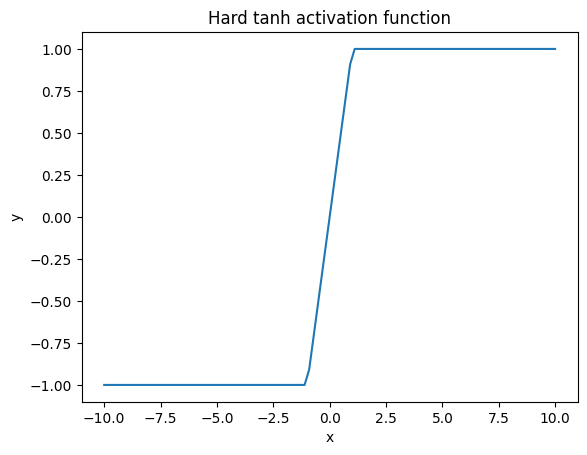

In [21]:
def hard_tanh(x):
    return np.maximum(np.minimum(1, x), -1)

# Plot the graph of hard tanh
x = np.linspace(-10, 10, 100)
y = hard_tanh(x)

plt.plot(x, y)
plt.title("Hard tanh activation function")
plt.xlabel('x')
plt.ylabel('y')

# Architecture

The **architecture** refers to the overall structure of the networkL how many units is should have and how these units should be connected to eachother.

Most neural networks are oganized into groups of units called layers. Most neural network architectures arrange these layers in a chain structure, with each layer being a function of the layer that preceded it.

In this structure, the first layer is given by

$$
  h^{(1)} = g^{(1)} ( W^{(1)\top} x + b)
$$

The second layer is given by

$$
  h^{(2)} = g^{(2)} ( W^{(2)\top} h^{(1)} + b)
$$

# Universal Approximation Theory

Feedforward networks with hidden layers provide a universal approximator framework. Specficially, (Hornik 1989) the universal approximation theorem states that a feedfoward network with linear output layer and at least one hidden layer with any "squashing" activation function (such as the logistic sigmoid fuinction) can approximate and Borel measurable function from one finite-dimensional space to another with any nonzero amount of error, provided that the network is given enough hidden units.

The derivatives of the feedfoward network can also approximate the derivatives of the function aritrarily well (Hornik 1990).

# ELIF

Any continious function can be approximately arbitrarily well with a neural network.

Explained here: https://www.youtube.com/watch?v=15bmcav7ynE  